<a href="https://colab.research.google.com/github/Luis98ros/Detection_Fraude_Regression_Trees/blob/main/Deteccion_Fraudes_Regresion_Arbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso 1. Cargar Librerias

In [ ]:
!pip install dtreeviz  # versión 2.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 792.0 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz
import dtreeviz

Importamos datos y breve exploracion de la informacion

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML Datos/Examen Modulo 1/FraudeCanastas.csv")

In [ ]:
def evaluación(modelo, conjunto):
    mensaje_error = 'conjunto solo puede ser "entrenamieonto" o "prueba"'
    assert conjunto in ['entrenamiento', 'prueba'], mensaje_error


    if conjunto == 'entrenamiento':
      X = X_train
      y = y_train
    else:
      X = X_test
      y = y_test


    y_pred = modelo.predict(X)
    precision = accuracy_score(y, y_pred)*100


    data = {'y_Real':  y,
            'y_Prediccion': y_pred
            }

    df = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])


    confusion_matrix = pd.crosstab(df['y_Real'], df['y_Prediccion'],
                                   rownames=['Real'], colnames=['Predicción'])


    titulo = 'Datos:{}, precisión = {:4.2f}'.format(conjunto, precision)
    sns.heatmap(confusion_matrix, annot=True, fmt='g').set(title = titulo)
    plt.show()

In [ ]:
def grafica_roc(clf, y_test):
    '''Grafica la curva ROC para el conjunto de prueba'''
    y_test_score = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve( y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label="Curva ROC (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], "--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate ")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def describe_datos(df):
    unicos =[]
    for col in df:
        unicos.append(df[col].unique())
    unicos = pd.Series(unicos, index=df.columns)
    descripcion = pd.concat([df.dtypes, df.isna().sum(),df.nunique(),unicos], axis=1)
    descripcion.columns = ['dtypes', 'null','nunique','unique' ]
    return(descripcion)

In [ ]:
#2457 features y 9319 filas

print(df.shape)
df.head()

(9319, 2457)


,ID,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,...,WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY RETAILER LEOPARD PRINT JERSEY PY,WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO VELOUR JOGGER LOUNGE PANT,WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA PRINT PYJAMA BOTTOMS BLACK 10,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min,fraud_flag
0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1299,649.500000,1299,0.0,1.0
1,195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,4119,1373.000000,2470,0.0,1.0
2,217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,2806,1403.000000,2799,7.0,1.0
3,552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
4,854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19,27,1807,66.925926,195,4.0,1.0


In [ ]:
df.describe()

,ID,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,...,WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY RETAILER LEOPARD PRINT JERSEY PY,WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO VELOUR JOGGER LOUNGE PANT,WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA PRINT PYJAMA BOTTOMS BLACK 10,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min,fraud_flag
count,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,...,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000
mean,58763.568409,0.107308,0.002146,0.305290,0.207533,0.050971,0.014916,0.292521,0.230175,0.353471,...,0.003005,0.001932,0.002790,1.774761,1.856852,1337.801052,898.376189,1184.433416,647.735165,0.141539
std,33714.628042,10.358941,0.207179,7.606907,6.133545,2.843956,1.439893,6.848110,6.695964,13.926653,...,0.290050,0.186461,0.269332,1.541868,1.922323,1070.597321,734.425487,786.942018,841.194373,0.348595
min,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,219.000000,41.615385,130.000000,0.000000,0.000000
25%,29529.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,838.000000,445.500000,749.000000,7.000000,0.000000
50%,58489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1124.000000,745.400000,1049.000000,379.000000,0.000000
75%,88902.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,1612.000000,1150.000000,1415.500000,1099.000000,0.000000
max,115942.000000,1000.000000,20.000000,500.000000,436.000000,168.000000,139.000000,169.000000,195.000000,549.000000,...,28.000000,18.000000,26.000000,38.000000,44.000000,24551.000000,19999.000000,19999.000000,19999.000000,1.000000


In [ ]:
#Revisamos un poco la data, vemos que no hay nulos

describe_datos(df)

,dtypes,null,nunique,unique
ID,int64,0,9319,"[130, 195, 217, 552, 854, 855, 856, 941, 1157,..."
APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,float64,0,2,"[0.0, 1000.0]"
AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,float64,0,2,"[0.0, 20.0]"
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,float64,0,8,"[0.0, 125.0, 119.0, 120.0, 500.0, 129.0, 109.0..."
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,float64,0,8,"[0.0, 109.0, 100.0, 105.0, 104.0, 99.0, 119.0,..."
...,...,...,...,...
costo_total,int64,0,1639,"[1299, 4119, 2806, 1206, 1807, 1263, 942, 1199..."
costo_medio_item,float64,0,2034,"[649.5, 1373.0, 1403.0, 603.0, 66.925925925925..."
costo_item_max,int64,0,540,"[1299, 2470, 2799, 1199, 195, 280, 938, 929, 1..."
costo_item_min,float64,0,528,"[0.0, 7.0, 4.0, 1249.0, 25.0, 2470.0, 999.0, 1..."


In [ ]:
df['fraud_flag'] = df['fraud_flag'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9319 entries, 0 to 9318
Columns: 2457 entries, ID to fraud_flag
dtypes: float64(2451), int64(6)
memory usage: 174.7 MB


In [ ]:
#Base desbalanceada

df.fraud_flag.value_counts()

,count
fraud_flag,
0,8000
1,1319


In [ ]:
y = df["fraud_flag"]

In [ ]:
X = df.iloc[:,1:2456]
X

,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX NOISE CANCELLING WIRELESS BLUETO,...,WOMEN S FOOTWEAR | UGG | UGG CLASSIC MINI II SHORT SHEEPSKIN BOOTS CHESTNUT,WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY RETAILER LEOPARD PRINT JERSEY PY,WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO VELOUR JOGGER LOUNGE PANT,WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA PRINT PYJAMA BOTTOMS BLACK 10,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,2,1299,649.500000,1299,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,3,4119,1373.000000,2470,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,2,2806,1403.000000,2799,7.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19,27,1807,66.925926,195,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,369,369.000000,369,369.0
9315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16,20,2667,133.350000,423,15.0
9316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,849,849.000000,849,849.0
9317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,2,1906,953.000000,1899,7.0


Dividir conjuntos de prueba y entrenamiento

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y,
                                                     test_size=0.2,
                                                     shuffle=True,
                                                     random_state=9
                                                     )

print("TRAINING SET")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
print('Fraude:{:7.3f}%'.format(y_train.mean()*100),'\n')

print("TEST SET")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
print('Fraude:{:7.3f}%'.format(y_test.mean()*100))

TRAINING SET
X:  (7455, 2455)
y:  (7455,)
Fraude: 13.991% 

TEST SET
X:  (1864, 2455)
y:  (1864,)
Fraude: 14.807%


Arbol de decision

In [ ]:
#Comenzamos con un arbol de decision para poder entender un poco mas la data y como se relaciona.
#Evaluamos la data con un  arbol de decision, dandonos un resultado de 92.46% en entrenamiento y 87.82% en test

profundidad = None

# Entrenamiento del modelo.
clasificador = DecisionTreeClassifier( max_depth=profundidad,
                                      criterion="entropy",
                                      random_state=0)
clasificador.fit(X_train, y_train)
print("La profundida del árbol es: {}".format(clasificador.get_depth()))


# Predicción y evaluación sobre el conjunto de entrenamiento.
y_pred_train = clasificador.predict(X_train)
exactitud_train = accuracy_score(y_train, y_pred_train)*100
print("Exactitud conjunto de entrenamiento: {:4.2f}%".format(exactitud_train))


# Predicción y evaluación sobre el conjunto de prueba.
y_pred_test = clasificador.predict(X_test)
exactitud_test = accuracy_score(y_test, y_pred_test)*100
print("Exactitud conjunto de prueba: {:4.2f}%".format(exactitud_test),'\n')


La profundida del árbol es: 63
Exactitud conjunto de entrenamiento: 92.46%
Exactitud conjunto de prueba: 87.82% 



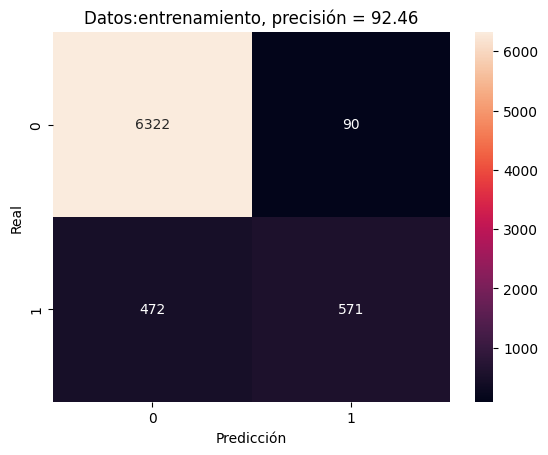

In [ ]:
evaluación(clasificador, 'entrenamiento')

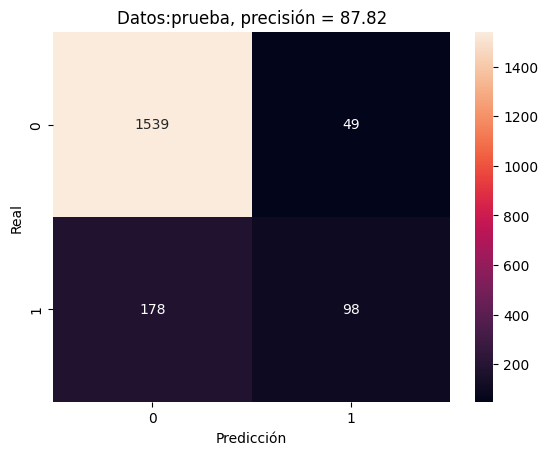

In [ ]:
evaluación(clasificador, 'prueba')

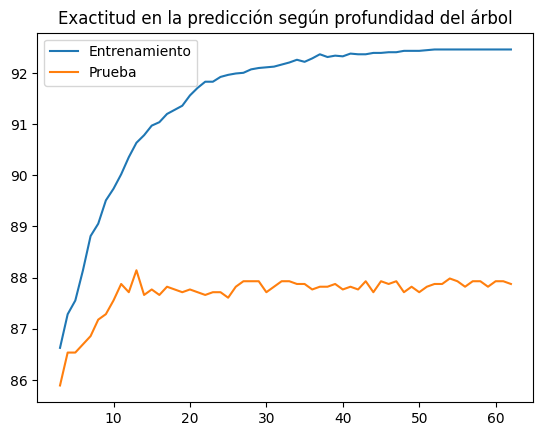

In [ ]:
# Revisamos la profundidad adecuada del arbol, siendo 13 el resultado optimo, aqui lo evalue con limite de 63 pero se hicieron pruebas hasta con 1000 de profundidad

clf = {}
y_pred_train = {}
y_pred_test = {}
exactitud_train={}
exactitud_test = {}

for p in range(3,63):
    # Entrenamiento del modelo
    clf[p] = DecisionTreeClassifier(max_depth = p,
                               criterion = "entropy",
                               random_state = 0).fit(X_train, y_train)

    # Predicción y evaluación sobre el conjunto de entrenamiento
    y_pred_train[p] = clf[p].predict(X_train)
    exactitud_train[p] = accuracy_score(y_train, y_pred_train[p])*100

    # Predicción y evaluación sobre el conjunto de prueba
    y_pred_test[p] = clf[p].predict(X_test)
    exactitud_test[p] = accuracy_score(y_test, y_pred_test[p])*100

exactitud_df = pd.DataFrame( {'Entrenamiento':exactitud_train,
                           'Prueba': exactitud_test})

exactitud_df.plot.line(
    title ='Exactitud en la predicción según profundidad del árbol')
plt.show()

In [ ]:
profundidad_optima = exactitud_df['Prueba'].idxmax()
profundidad_optima

13

In [ ]:
model = clf[profundidad_optima]

In [ ]:
dot_data = export_graphviz(model, feature_names=X.columns,
                           class_names=['No Fraude','Fraude'],
                           max_depth = 13,
                           rounded = True,
                           filled = True,
                           )


In [ ]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="costo_item_max <= 948.5\\nentropy = 0.584\\nsamples = 7455\\nvalue = [6412, 1043]\\nclass = No Fraude", fillcolor="#e99559"] ;\n1 [label="FULFILMENT CHARGE | RETAILER | RETAILER <= 2.0\\nentropy = 0.357\\nsamples = 3051\\nvalue = [2845, 206]\\nclass = No Fraude", fillcolor="#e78a47"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="costo_medio_item <= 587.0\\nentropy = 0.249\\nsamples = 2429\\nvalue = [2328, 101]\\nclass = No Fraude", fillcolor="#e68642"] ;\n1 -> 2 ;\n3 [label="COMPUTERS | APPLE | 2020 APPLE MAC MINI DESKTOP COMPUTER M1 PROCESSOR <= 315.0\\nentropy = 0.129\\nsamples = 1572\\nvalue = [1544, 28]\\nclass = No Fraude", fillcolor="#e5833d"] ;\n2 -> 3 ;\n4 [label="COMPUTERS | APPLE | 2022 APPLE IPAD AIR 10 9 M1 PROCESSOR IPADOS WI-FI <= 534.0\\nentropy = 0.118\\nsamples = 1566\\nvalue = [1541, 25]\\nclass = No 

In [ ]:
#Encontramos las variables mas importantes, dandonos solo 73 variables importantes y el resto con importancia practicamente nula

importancia = pd.Series(model.feature_importances_,
                    index=X.columns.values)
importancia.sort_values()
importancia.sort_values().to_excel("/content/drive/MyDrive/ML Datos/Examen Modulo 1/importancia.xlsx")
#importancia.sort_values().plot(kind = 'barh',figsize=(10, 10))
#plt.show()

In [ ]:
columnas_importantes = importancia[importancia.values > 0].index.tolist()

In [ ]:
X_CI = X[columnas_importantes]
X_CI

,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX NOISE CANCELLING WIRELESS BLUETO,BABY CHILD TRAVEL | MAXI-COSI | MAXI-COSI I-SIZE FAMILYFIX 360 ISOFIX ROTATING CAR,BATH LINEN | RETAILER | RETAILER EGYPTIAN COTTON FACE CLOTH SET,CABLES ADAPTERS | APPLE | APPLE MJ1M2ZM A USB-C TO USB ADAPTOR,COMPUTER PERIPHERALS & ACCESSORIES | APPLE | APPLE MAGIC MOUSE 2 (2015),COMPUTER PERIPHERALS & ACCESSORIES | APPLE | APPLE WATCH SERIES 6,COMPUTER PERIPHERALS ACCESSORIES | APPLE | APPLE MAGIC KEYBOARD FOR 11 IPAD PRO 2021 WHITE,COMPUTER PERIPHERALS ACCESSORIES | APPLE | APPLE MAGIC KEYBOARD FOR 12 9 IPAD PRO 2021 BLACK,COMPUTER PERIPHERALS ACCESSORIES | APPLE | APPLE MAGIC MOUSE 2 2015 WHITE,...,TELEVISIONS HOME CINEMA | SAMSUNG | SAMSUNG QE85Q70A 2021 QLED HDR 4K ULTRA HD SMART T,TELEVISIONS HOME CINEMA | SONY | SONY BRAVIA KD75X89J 2021 LED HDR 4K ULTRA HD SMAR,TELEVISIONS HOME CINEMA | SONY | SONY BRAVIA XR XR55A80J 2021 OLED HDR 4K ULTRA HD,WARRANTY | RETAILER | RETAILER,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,2,1299,649.500000,1299,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,3,4119,1373.000000,2470,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,2,2806,1403.000000,2799,7.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,19,27,1807,66.925926,195,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,369,369.000000,369,369.0
9315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16,20,2667,133.350000,423,15.0
9316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,849,849.000000,849,849.0
9317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,2,1906,953.000000,1899,7.0


In [ ]:
#Volvemos a entrenar el modelo solo con las 73 columnas importantes, los cambios son minimos

X_train, X_test , y_train, y_test = train_test_split(X_CI, y,
                                                     test_size=0.2,
                                                     shuffle=True,
                                                     random_state=9
                                                     )
profundidad = None
# Entrenamiento del modelo.
clasificador_CI = DecisionTreeClassifier( max_depth=profundidad,
                                      criterion="entropy",
                                      random_state=0)
clasificador_CI.fit(X_train, y_train)
print("La profundida del árbol es: {}".format(clasificador.get_depth()))


# Predicción y evaluación sobre el conjunto de entrenamiento.
y_pred_train_CI = clasificador_CI.predict(X_train)
exactitud_train_CI = accuracy_score(y_train, y_pred_train_CI)*100
print("Exactitud conjunto de entrenamiento: {:4.2f}%".format(exactitud_train_CI))


# Predicción y evaluación sobre el conjunto de prueba.
y_pred_test_CI = clasificador_CI.predict(X_test)
exactitud_test_CI = accuracy_score(y_test, y_pred_test_CI)*100
print("Exactitud conjunto de prueba: {:4.2f}%".format(exactitud_test_CI),'\n')


La profundida del árbol es: 63
Exactitud conjunto de entrenamiento: 92.18%
Exactitud conjunto de prueba: 87.66% 



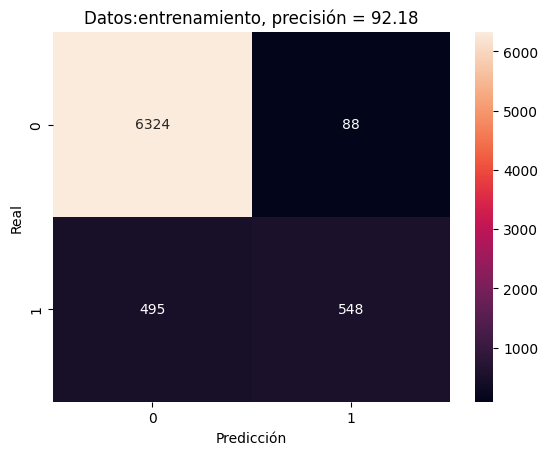

In [ ]:
evaluación(clasificador_CI, 'entrenamiento')

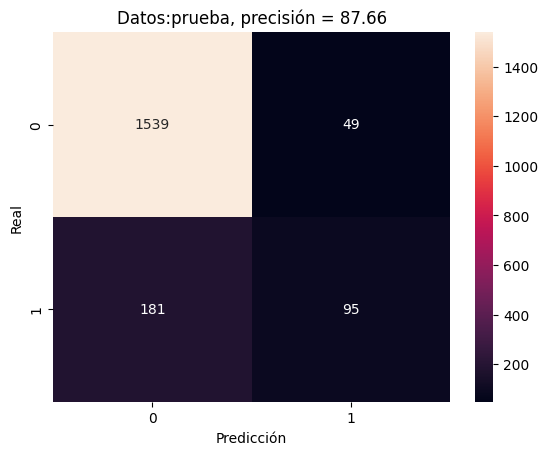

In [ ]:
evaluación(clasificador_CI, 'prueba')

In [ ]:
resultados_arbol = {
    "P(No Fraude)" : clasificador.predict_proba(X_test)[:,0],
    "P(Fraude)" : clasificador.predict_proba(X_test)[:,1],
    "Prediccion" :  clasificador.predict(X_test),
}

predicciones_arbol = pd.DataFrame(resultados_arbol)
predicciones_arbol.sort_values("P(No Fraude)",ascending = False).iloc[0:100]


,P(No Fraude),P(Fraude),Prediccion
1863,1.0,0.0,0.0
779,1.0,0.0,0.0
795,1.0,0.0,0.0
794,1.0,0.0,0.0
793,1.0,0.0,0.0
...,...,...,...
887,1.0,0.0,0.0
1380,1.0,0.0,0.0
885,1.0,0.0,0.0
884,1.0,0.0,0.0


In [ ]:
#Intentamos definir un umbral para enocntrar una equivalencia entre los errores de tipo 1 y 2

predicciones_arbol["Prediccion_30"] = np.where(predicciones_arbol["P(Fraude)"] > 0.25,1,0)
predicciones_arbol.sort_values('P(Fraude)',
                         ascending=False).iloc[125:165]

,P(No Fraude),P(Fraude),Prediccion,Prediccion_30
629,0.368421,0.631579,1.0,1
944,0.368421,0.631579,1.0,1
439,0.368421,0.631579,1.0,1
996,0.368421,0.631579,1.0,1
1341,0.368421,0.631579,1.0,1
900,0.368421,0.631579,1.0,1
1702,0.368421,0.631579,1.0,1
1116,0.375000,0.625000,1.0,1
1610,0.454545,0.545455,1.0,1
1314,0.454545,0.545455,1.0,1


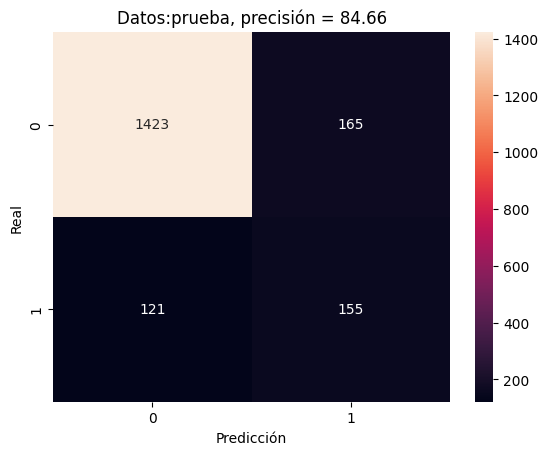

In [ ]:
#Aqui vemos que los resultados entre los errores de tipo 1 y tipo 2 tienen una gran diferencia

precision = accuracy_score(y_test, predicciones_arbol["Prediccion_30"])*100

data = {'y_Real':  y_test.to_numpy(),
        'y_Prediccion': predicciones_arbol['Prediccion_30']
        }

df_arbol = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

confusion_matrix_arbol = pd.crosstab(df_arbol['y_Real'], df_arbol['y_Prediccion'],
                                rownames=['Real'], colnames=['Predicción'])
titulo = 'Datos:{}, precisión = {:4.2f}'.format("prueba", precision)
sns.heatmap(confusion_matrix_arbol, annot=True, fmt='g').set(title = titulo)
plt.show()

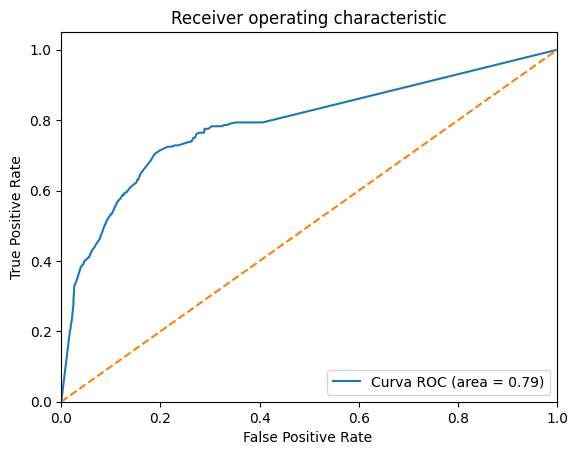

In [ ]:
#Curva Roc con  area de 79

y_test_score = clasificador_CI.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve( y_test, y_test_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label="Curva ROC (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()


Regresion logistica

In [ ]:
#Cuando vi la data y el problema pense inmediatamente que una regresion logistica podria funcionar mucho mejor, puesto que al ser una base desbalanceada un perceptron no funcionaria muy bien al igual que por el tamano de las diemnsiones un arbol podria tener problemas
#A continuacion se evaluo el modelo con 73 pero tambien se hizo con todas las columnas, sin embargo considere evaluarlo solo con las 73 columnas mas importantes para ver como podria relacionarse lo anteriormente visto en el arbol y una regresion
#Volvemos a dividir nuestro dataset original en test y entrenamiento, despues de varias pruebas decidi usar solo las 73 columnas mas improtantes que nos daba el arbol de decision

X_train, X_test , y_train, y_test = train_test_split(X_CI, y,
                                                     test_size=0.2,
                                                     shuffle=True,
                                                     random_state=9
                                                     )

In [ ]:
#Empezamos con la regresion logistica, sin embargo durante el procesamiento mostraba warnings de convergencia por lo que decidi poner en la misma escala los valores
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clasificador_rl = LogisticRegression(penalty= None,
                                     random_state=4,
                                     solver="newton-cg").fit(X_train_scaled, y_train)

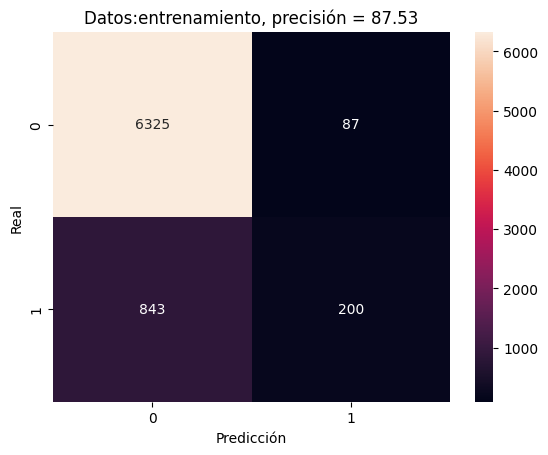

In [ ]:
y_pred = clasificador_rl.predict(X_train_scaled)
precision = accuracy_score(y_train, y_pred)*100

data = {'y_Real':  y_train,
        'y_Prediccion': y_pred
    }

df_logistic = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])


confusion_matrix_log = pd.crosstab(df_logistic['y_Real'], df_logistic['y_Prediccion'],
                                   rownames=['Real'], colnames=['Predicción'])


titulo = 'Datos:{}, precisión = {:4.2f}'.format("entrenamiento", precision)
sns.heatmap(confusion_matrix_log, annot=True, fmt='g').set(title = titulo)
plt.show()


#evaluación(clasificador_rl, 'entrenamiento')

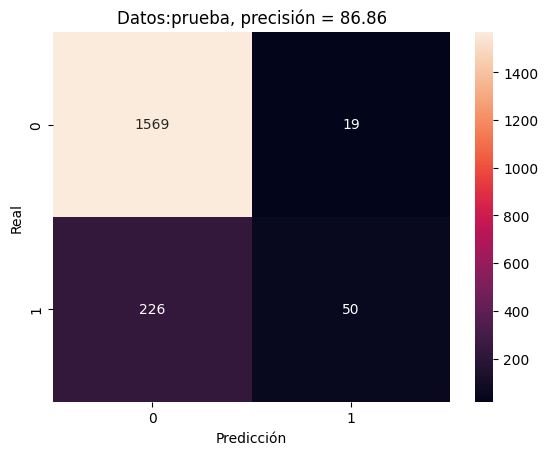

In [ ]:
y_pred = clasificador_rl.predict(X_test_scaled)
precision = accuracy_score(y_test, y_pred)*100

data = {'y_Real':  y_test,
        'y_Prediccion': y_pred
    }

df_logistic_test = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])


confusion_matrix_log_test = pd.crosstab(df_logistic_test['y_Real'], df_logistic_test['y_Prediccion'],
                                   rownames=['Real'], colnames=['Predicción'])


titulo = 'Datos:{}, precisión = {:4.2f}'.format("prueba", precision)
sns.heatmap(confusion_matrix_log_test, annot=True, fmt='g').set(title = titulo)
plt.show()


#evaluación(clasificador_rl, 'prueba')

In [ ]:
resultados = {
    "P(No Fraude)" : clasificador_rl.predict_proba(X_test_scaled)[:,0],
    "P(Fraude)" : clasificador_rl.predict_proba(X_test_scaled)[:,1],
    "Prediccion" :  clasificador_rl.predict(X_test_scaled),
}

predicciones = pd.DataFrame(resultados)
predicciones.sort_values("P(No Fraude)",ascending = False).iloc[0:100]


,P(No Fraude),P(Fraude),Prediccion
515,1.000000,8.088355e-74,0
1777,1.000000,3.290754e-42,0
774,1.000000,2.666758e-42,0
1074,1.000000,4.443658e-42,0
1786,1.000000,2.177549e-32,0
...,...,...,...
778,0.991231,8.768610e-03,0
528,0.991228,8.772226e-03,0
1682,0.991211,8.789308e-03,0
510,0.991152,8.847575e-03,0


In [ ]:
predicciones["Prediccion_30"] = np.where(predicciones["P(Fraude)"] > 0.25,1,0)
predicciones.sort_values('P(Fraude)',
                         ascending=False).iloc[125:165]

,P(No Fraude),P(Fraude),Prediccion,Prediccion_30
727,0.613447,0.386553,0,1
1436,0.614620,0.385380,0,1
131,0.615728,0.384272,0,1
1274,0.616030,0.383970,0,1
904,0.616030,0.383970,0,1
1287,0.616030,0.383970,0,1
60,0.616701,0.383299,0,1
36,0.616701,0.383299,0,1
232,0.616701,0.383299,0,1
1340,0.616701,0.383299,0,1


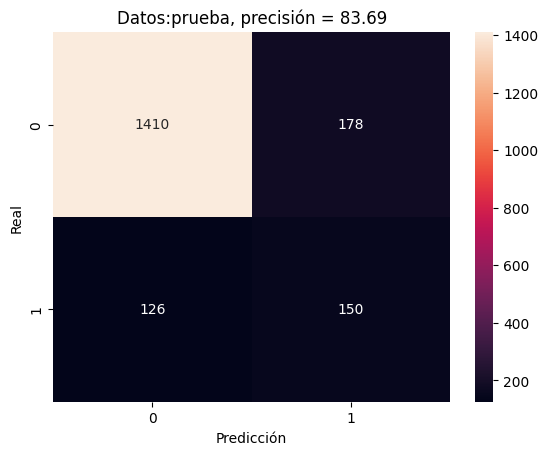

In [ ]:
#Despues de varias pruebas definimos un umbral > 0.25 para poder  tener una mejora en el caso de que sea fraude y la prediccion sea no fraude, sin afectar tanto al error tipo 2



precision = accuracy_score(y_test, predicciones["Prediccion_30"])*100

data = {'y_Real':  y_test.to_numpy(),
        'y_Prediccion': predicciones['Prediccion_30']
        }

df_log = pd.DataFrame(data, columns=['y_Real','y_Prediccion'])

confusion_matrix = pd.crosstab(df_log['y_Real'], df_log['y_Prediccion'],
                                rownames=['Real'], colnames=['Predicción'])
titulo = 'Datos:{}, precisión = {:4.2f}'.format("prueba", precision)
sns.heatmap(confusion_matrix, annot=True, fmt='g').set(title = titulo)
plt.show()

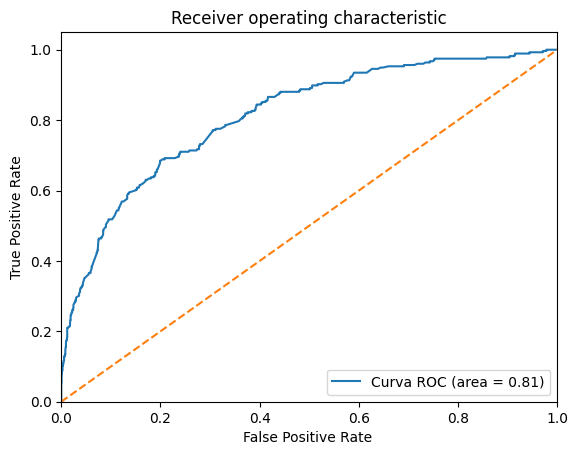

In [ ]:
#tenemos una curva roc con area de 81

grafica_roc(clasificador_rl, y_test)

## Conclusion
 Dada los resultados vemos que no hay una gran diferencia entre un arbol de decision y una regresion logistica, al menos en la matriz de confusion y la curva roc, sin embargo para temas de predicciones se apostaria mas por la regresion con un umbral de 0.25 ya que no parece sobreajustar tanto la data con las 73 columnas o con todas las columnas en el modelo, ademas se apuesta por un umbral de 0.25 porque reduce el error cuando es fraude pero se predice como no fraude y al mismo tiempo no incrementa tanto el error opuesto.
